In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from brian2 import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import stats
import pandas as pd
import matplotlib.image as mpimg
from utils import despine_ax

plt.style.use('jns')

INFO       Cache size for target 'cython': 2207 MB.
You can call clear_cache('cython') to delete all files from the cache or manually delete files in the '/home/barta/.cython/brian_extensions' directory. [brian2]


In [3]:
MS = 3

In [4]:
img_eql = mpimg.imread('img/equilibration_pid.png')
img_olf = mpimg.imread('img/olfactometer.png')

In [5]:
lnlool = np.array([
    [1, 0.92],
    [2, 0.49],
    [5, 0.31],
    [10, 0.25],
    [20, 0.24],
    [60, 0.23],
    [300, 0.22]
])

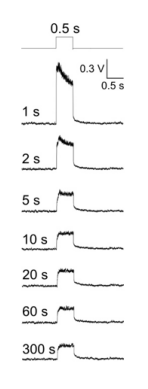

In [6]:
fig, ax = plt.subplots()

def plot_pid_traces(ax):
    ax.imshow(img_eql)
    despine_ax(ax)
    
plot_pid_traces(ax)

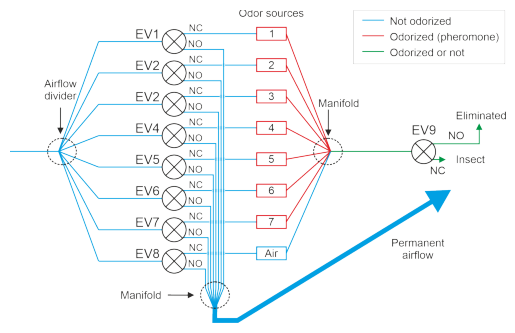

In [7]:
fig, ax = plt.subplots()

def plot_olfactometer(ax):
    ax.imshow(img_olf)
    despine_ax(ax)
    
plot_olfactometer(ax)

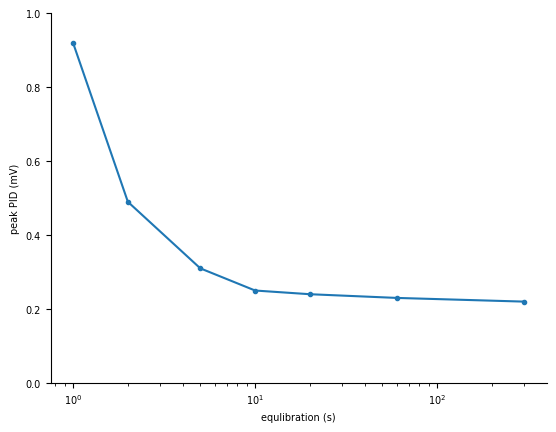

In [8]:
fig, ax = plt.subplots()

def plot_pid_eq(ax):
    ax.plot(*lnlool.T, marker='o', ms=MS)
    ax.set_xscale('log')
    ax.set_ylabel('peak PID (mV)')
    ax.set_xlabel('equlibration (s)')
    ax.set_ylim(0,1)
    
plot_pid_eq(ax)

In [9]:
ssr_increasing = np.array([
    [11, 15, 19, 25, 26],
    [20, 23, 27, 31, 28],
    [0, 5, 11, 16, 15]
])

ssr_decreasing = np.array([
    [9, 13, 23, 29, 35],
    [0, 6, 11, 9, 13],
    [8, 10, 9, 11, 11]
])

ssr_times = [1, 3, 10, 30, 79]

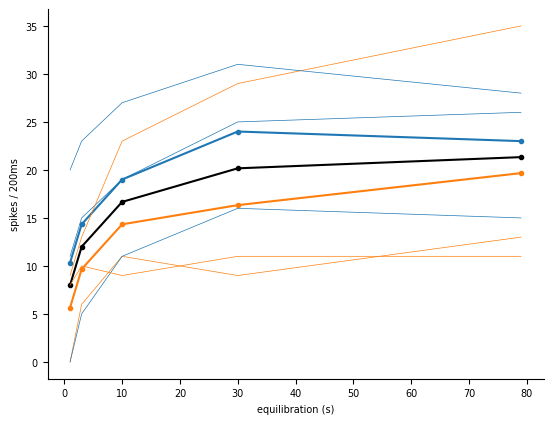

In [33]:
fig, ax = plt.subplots()

def plot_ssr_eq(ax):
    mean_inc = ssr_increasing.mean(axis=0)
    mean_dec = ssr_decreasing.mean(axis=0)

    ax.plot(ssr_times, mean_inc, marker='o', label='increasing', ms=MS)
    ax.plot(ssr_times, mean_dec, marker='o', label='decreasing', ms=MS)
    ax.plot(ssr_times, (mean_inc+mean_dec)/2, marker='o', color='black', ms=MS)
    
    for i in range(3):
        ax.plot(ssr_times, ssr_increasing[i], ms=MS, color='C0', lw=0.5)
        ax.plot(ssr_times, ssr_decreasing[i], ms=MS, color='C1', lw=0.5)

    ax.set_xlabel('equilibration (s)')
    ax.set_ylabel('spikes / 200ms')
    
plot_ssr_eq(ax)

In [23]:
stability_ssr = np.array([
    [15,35,25,21],
    [16,39,26,20],
    [18,40,27,21],
    [20,41,29,20],
    [18,42,29,24],
    [22,42,27,22],
    [17,41,28,23],
    [16,40,28,26],
    [18,41,26,25]
]).T

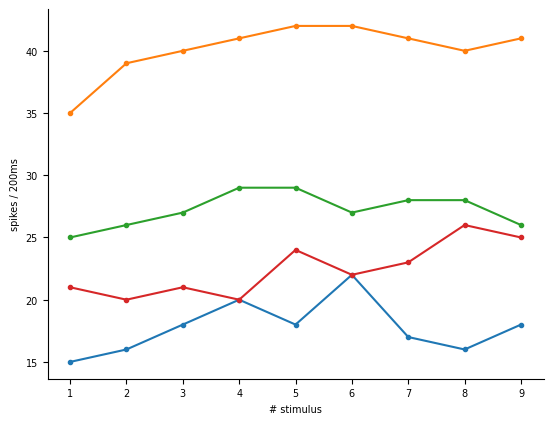

In [24]:
fig, ax = plt.subplots()

def plot_stability_source(ax):
    trials = np.arange(len(stability_ssr[0])) + 1

    for sens in stability_ssr:
        ax.plot(trials, sens, marker='o', ms=MS)

    ax.set_xlabel('# stimulus')
    ax.set_ylabel('spikes / 200ms')
    
plot_stability_source(ax)

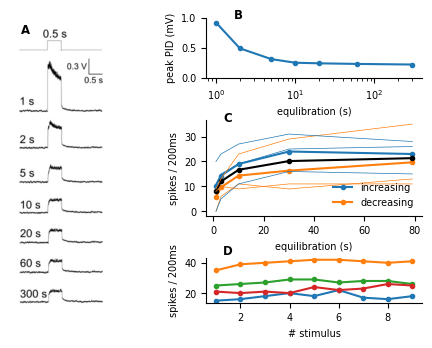

In [36]:
fig = plt.figure(figsize=(4.5,3))

gs_img = fig.add_gridspec(1,1, top=1, bottom=0., left=0, right=0.4)
ax_img = fig.add_subplot(gs_img[:])

plot_pid_traces(ax_img)
ax_img.set_title('A', fontweight='bold', x=0.15, y=0.92)

gs_pid_eq = fig.add_gridspec(1,1, top=1, bottom=0.8, left=0.52, right=1)
ax_pid_eq = fig.add_subplot(gs_pid_eq[:])

plot_pid_eq(ax_pid_eq)
ax_pid_eq.set_title('B', fontweight='bold', x=0.15, y=0.85)

gs_ssr_eq = fig.add_gridspec(1,1, top=.66, bottom=0.34, left=0.52, right=1)
ax_ssr_eq = fig.add_subplot(gs_ssr_eq[:])

plot_ssr_eq(ax_ssr_eq)
ax_ssr_eq.legend(frameon=False)
ax_ssr_eq.set_title('C', fontweight='bold', x=0.1, y=0.9)

gs_ssr_stab = fig.add_gridspec(1,1, top=.2, bottom=0.05, left=0.52, right=1)
ax_ssr_stab = fig.add_subplot(gs_ssr_stab[:])
ax_ssr_stab.set_title('D', fontweight='bold', x=0.1, y=0.9)

plot_stability_source(ax_ssr_stab)

# plt.savefig('img/equilibration.png')

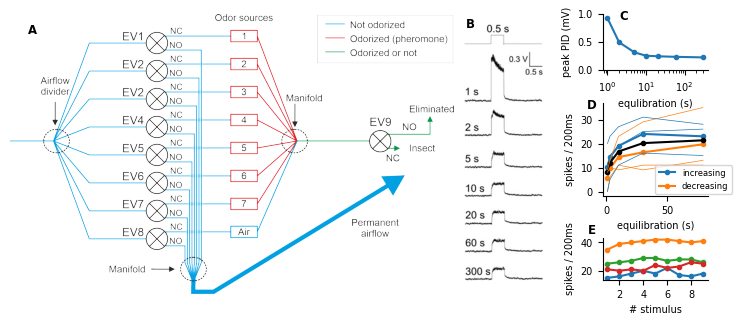

In [49]:
fig = plt.figure(figsize=(7,2.8))

gs_olf = fig.add_gridspec(1,1, top=1, bottom=0., left=0.0, right=0.64)
ax_olf = fig.add_subplot(gs_olf[:])
plot_olfactometer(ax_olf)
ax_olf.set_title('A', fontweight='bold', x=0.05, y=0.9)

gs_img = fig.add_gridspec(1,1, top=1, bottom=0., left=0.62, right=0.8)
ax_img = fig.add_subplot(gs_img[:])

plot_pid_traces(ax_img)
ax_img.set_title('B', fontweight='bold', x=0.15, y=0.92)

gs_ssr_eq = fig.add_gridspec(1,1, top=.68, bottom=0.35, left=0.85, right=1)
ax_ssr_eq = fig.add_subplot(gs_ssr_eq[:])

plot_ssr_eq(ax_ssr_eq)
ax_ssr_eq.legend(frameon=True, loc=(0.5,0.02), fontsize=6)
ax_ssr_eq.set_title('D', fontweight='bold', x=-0.1, y=0.85)

gs_pid_eq = fig.add_gridspec(1,1, top=1, bottom=0.8, left=0.85, right=1)
ax_pid_eq = fig.add_subplot(gs_pid_eq[:])

plot_pid_eq(ax_pid_eq)
ax_pid_eq.set_title('C', fontweight='bold', x=0.2, y=0.75)

gs_ssr_stab = fig.add_gridspec(1,1, top=.2, bottom=0.05, left=0.85, right=1)
ax_ssr_stab = fig.add_subplot(gs_ssr_stab[:])
ax_ssr_stab.set_title('E', fontweight='bold', x=-0.1, y=0.9)

ax_ssr_stab.set_xticks([2,4,6,8])

plot_stability_source(ax_ssr_stab)

plt.savefig('img/olfactometer_fullfig.png')

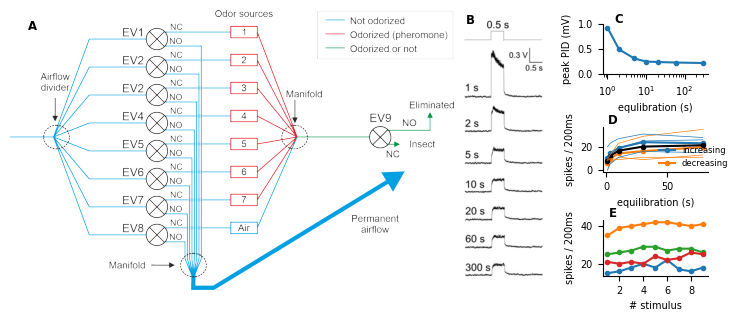

In [37]:
fig = plt.figure(figsize=(7,2.8))

gs_olf = fig.add_gridspec(1,1, top=1, bottom=0., left=0.0, right=0.64)
ax_olf = fig.add_subplot(gs_olf[:])
plot_olfactometer(ax_olf)
ax_olf.set_title('A', fontweight='bold', x=0.05, y=0.9)

gs_img = fig.add_gridspec(1,1, top=1, bottom=0., left=0.62, right=0.8)
ax_img = fig.add_subplot(gs_img[:])

plot_pid_traces(ax_img)
ax_img.set_title('B', fontweight='bold', x=0.15, y=0.92)

gs_pid_eq = fig.add_gridspec(1,1, top=0.95, bottom=0.77, left=0.85, right=1)
ax_pid_eq = fig.add_subplot(gs_pid_eq[:])

plot_pid_eq(ax_pid_eq)
ax_pid_eq.set_title('C', fontweight='bold', x=0.15, y=0.85)

gs_ssr_eq = fig.add_gridspec(1,1, top=.58, bottom=0.42, left=0.85, right=1)
ax_ssr_eq = fig.add_subplot(gs_ssr_eq[:])

plot_ssr_eq(ax_ssr_eq)
ax_ssr_eq.legend(frameon=False, loc=(0.5,0.02), fontsize=6)
ax_ssr_eq.set_title('D', fontweight='bold', x=0.1, y=0.9)

gs_ssr_stab = fig.add_gridspec(1,1, top=.25, bottom=0.05, left=0.85, right=1)
ax_ssr_stab = fig.add_subplot(gs_ssr_stab[:])
ax_ssr_stab.set_title('E', fontweight='bold', x=0.1, y=0.9)

ax_ssr_stab.set_xticks([2,4,6,8])

plot_stability_source(ax_ssr_stab)

plt.savefig('img/olfactometer_fullfig.png')